<div>
<table style="width: 100%">
	<tr>
		<td>
		<table style="width: 100%">
			<tr>
                <td ><center><font size="30">Samikshya Chhetri</font><center>
                    <center><font size="30">WSE-HI 1076196</font><center></td>
			</tr>
			<tr>
                <td><center><font size="5">email: sch009@un-ihe.org</font><center></td>
			</tr>
			<tr>
                <td><center><font size="10">Python Assignment02</font><center></td>
			</tr>
		</table>
		</td>
		<td><img src='figures/python_logo.png'></img></td>
	</tr>
</table>
</div>   

<a id='table'></a>

### Notebook guide:

<a href='#library'>Python library</a>

<a href='#function'>Backwater function</a>

<a href='#parameters'>List of parameters</a>

<a href='#channel1'>Backwater curve for Channel 1</a>

<a href='#channel2'>Backwater curve for Channel 2</a>

<a href='#O'>Point of bifurcation</a>

<a href='#channel3'>Backwater curve for Channel 3</a>

<a href='#profile13'>Backwater curve for Channels 1 and 3</a>

<a href='#profile23'>Backwater curve for Channels 2 and 3</a>

## BACKWATER CURVE APPLICATION


<a id='library'></a>

### The Python Libraries

In [1]:
# IMPORT the python libraries: numpy for mathematical calculation, matplotlib to plot graphs, and pandas to plot tables

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<a id='function'></a>

<a href='#table'>Go to the Notebook guide</a>

## TASK 1: Create a function to calculate water depth at the most upstream point


In [3]:
# DEFINE a function "back_water" which gives the water depth at the last upstream point as output

# Part 1: The function statement
# WRITE the function statement in the form "def functionname(arguments): "
def back_water(Q, h0, b, slp , dx, n_steps, C):

    
    # Part 2: Function description
    # DESCRIBE what the function is, how it works, and DESCRIBE its input and output parameters 
    
    '''
    The function calculates the water depth at last upstream point.
    All of the following input parameters take numerical values as inputs:
        Q is discharge with unit m³/s (type- int or float)
        h0 is intial water with unit meter (type- int or float)
        b is the river width with unit meter (type- int or float)
        slp is the slope with no unit (type- int or float)
        dx is distance step with unit meter (type- int)
        n_steps is the uppermost point at which water depth is to be calculated with no unit (type- int)
        C is the Chezy's coefficient with unit m^(1/2)/s (type - int or float)
        
    Output:
        water depth at the last upstream point with unit m.
    
    Returns:
        the function will compute water depth at successive points till the last upstream point, but will only return the last depth
        
    Example of use:
        h = (Q1, 7, 100, 0.0005, 1000, 15, 50)
        print (h)
        
        output: 2.79864
    '''
    
    # Part 3: Validation of inputs
    # CHECK if the input values comply with the input type required by the function
    
    # All the input parameters take only numeric values
    if Q < 0 and type(Q) != float and type(Q) != int:
        raise TypeError("Discharge(Q) should be a non negative number")
        
    if type(h0) != float and type(h0) != int:
        raise TypeError('Initial river depth(h0) should be a non negative number')
        
    if  b < 0 and type(b) != float and type(b) != int:
        raise TypeError('River width(b) should be a non negative number')
    
    if slp < 0 and type(slp) != float and type(slp) != int:
        raise TypeError('Slope(slp) should be a non negative number')
    
    if dx < 0 and type(dx) != int:
        raise TypeError('Distance step(dx) should be a non negative integer')  
        
    if n_steps < 0 and type(n_steps) != int:
        raise TypeError('Number of distance step(n_steps) should be a non negative integer') 
    
    if C < 0 and type(C) != float and type(C) != int:
        raise TypeError('Chezy coefficient should be a non negative number') 
    
    # CHECK if the values in the denominator are 0 or not because when a value is divided by 0, it will give a ZeroDivisionError
    if h0 == 0:
        raise ZeroDivisionError('initial height(h0) should be different from zero!')
        
    if b == 0:
        raise ZeroDivisionError('River width(b) should be different from zero!')
        
    if C == 0:
        raise ZeroDivisionError('Chezy coefficient(C) should be different from zero!')
        
             
    # Part 4: Calculation
    # USE the input parameters in the formula to calculate water depth at specific points
    
      
    # CREATE an empty list to store the calculated depths and ADD the intial height to the list
    depth = []
    depth.append(h0)
    
    # CREATE a variable and a list to store the calculated distances
    dist = 0
    distance = [0] 
    
    # USE a loop to calculate the water depths upto the last point
    # The loop will run for n_steps times
    for i in range(1, n_steps+1):  
        
        #Formula to calcualte water depth at the given point using the water dpeth at previous point from the list 'depth'
        h = ((( Q **2/ (C**2 * ((depth[i-1])**3) * b **2) ) - slp ) *dx) + depth[i-1]         
        
        # ADD the calculated height to the list 'depth'
        depth.append(h)
        
        # CALCULATE the new distance and ADD it to the list 'distance'
        dist += dx
        distance.append(dist)
    
    # In the return statement, POINT out to the last element of the depth list which lies at the uppermost point  
    return depth[-1]

<a id='parameters'></a>
<a href='#table'>Go to the Notebook guide</a>

## TASK 2: Display the resulting backwater curve for all three channels

### Given parameters

In [4]:
# LOAD the values into respective variables to provide input in the function back_water

C = 50                                          # Chezy coefficient, m^(1/2)/s
dx = 1000                                       # Distance step, m
f = 150                                         # Constant, m²/s                              
Q1 = 500                                        # Initial discharge assumed for Channel 1, m³/s
Q2 = 500                                        # Initial discharge assumed for Channel 2, m³/s
Q3 = 1000                                       # Discharge for Channel 3, m³/s
slope1 = 0.0005                                 # Slope for Channel 1, unitless
slope2 = 0.0003                                 # Slope for Channel 2, unitless 
slope3 = 0.0005                                 # Slope for Channel 2, unitless
height1 = 7                                     # Height of Channel 1 at river mouth, m
height2 = 7                                     # Height of Channel 2 at river mouth, m
width1 = 100                                    # River width for Channel 1
width2 = 120                                    # River width for Channel 2
width3 = 200                                    # River width for Channel 3
length1 = 15000                                 # Channel 1 length, m
length2 = 25000                                 # Channel 2 length, m
length3 = 10000                                 # Channel 3 length, m


<a id='channel1'></a>

<a href='#table'>Go to the Notebook guide</a>

### A) Backwater curve for channel 1

#### In case of NameError, run these cells in this particular order:

<a href='#library'>Python library</a>


<a href='#function'>Backwater function</a>

<a href='#parameters'>List of parameters</a>

In [9]:
# FIND the last point on the upstream region
n_steps = length1/ dx

# CREATE empty lists to store the values of points, distance, critical, normal and water depth, geodetical and piezometric height
points1 = []
distance1 = []
geodet_ht1 = []
critcal_dpth1 = []
norml_dpth1 = []
wtr_depth1 = []
piezo_ht1 = []

# CALCULATE the critical depth
crit_d1 = ((Q1**2) / (9.81 * width1 **2)) ** (1/3)

# CALCULATE the normal depth
norm_d1 = ((Q1) / (width1 * C * np.sqrt(slope1))) ** (2/3)

# CREATE a loop that calculates distance, normal, critical and water depth, geodetical and piezometric height at each distance step
# The point of reference for geodetical height is river mouth
# The loop will run for n_steps + 1 number of times
for i in range (0,  int(n_steps + 1)):
    
    # CALCULATE the distance by multiplying point (i) with distance step
    dist = dx * i 
    
    # CALCULATE the geodectical heights by mulplying the distance at the point and slope
    geo = dist * slope1                                         
    
    # ADD geodetical height with calulated normal depth to compute the normal depth at a point for an inclined bed
    norm = norm_d1 + geo                                        
    
    # ADD geodetical height with calculated critical depth to compute the critical depth at a point for an inclined bed
    crit = crit_d1 + geo                                        
    
    # CALL the user-defined function 'back_water' to calculate water depth
    h1 = back_water(Q1, height1, width1, slope1, dx, i, C)      
    
    # ADD geodetical height with water depth to get piezometric height
    piezo = geo + h1                                       
    
    # ADD the values to their respective lists
    points1.append(i)
    distance1.append(dist)
    geodet_ht1.append(geo)
    critcal_dpth1.append(crit)
    norml_dpth1.append(norm)
    wtr_depth1.append(h1)
    piezo_ht1.append(piezo)
    i = i + 1

# CREATE a zipped list of points, distance, water depth, geodetical and piezometric height    
zipped_list = list(zip (points1, distance1, geodet_ht1,  wtr_depth1, piezo_ht1))    

# USE panda library to create a tabluated representation of data from the zipped list
data = pd.DataFrame(zipped_list, columns = ['Point', 'Distance', 'Depth','Geodetical height', 'Piezometric height'])

# DISPLAY the table
display(data)


,Point,Distance,Depth,Geodetical height,Piezometric height
0,0,0,0.0,7.000000,7.000000
1,1,1000,0.5,6.531500,7.031500
2,2,2000,1.0,6.070275,7.070275
3,3,3000,1.5,5.618578,7.118578
4,4,4000,2.0,5.179493,7.179493
5,5,5000,2.5,4.757249,7.257249
6,6,6000,3.0,4.357602,7.357602
7,7,7000,3.5,3.988176,7.488176
8,8,8000,4.0,3.658500,7.658500
9,9,9000,4.5,3.379143,7.879143


<a id='channel2'></a>
<a href='#table'>Go to the Notebook guide</a>

### B)  Backwater curve for channel 2

#### In case of NameError, run these cells in this particular order:

<a href='#library'>Python library</a>

<a href='#function'>Backwater function</a>

<a href='#parameters'>List of parameters</a>

In [6]:
# FIND the last point on the upstream region
n_steps = length2/ dx

# CREATE empty lists to store the values of points, distance, critical, normal, and water depth, geodetical and piezometric height
points2 = []
distance2 = []
geodet_ht2 = []
critcal_dpth2 = []
norml_dpth2 = []
wtr_depth2 = []
piezo_ht2 = []

# CALCULATE the critical depth
crit_d2 = ((Q2 **2) / (9.81 * width2 **2)) ** (1/3)

# CALCULATE the normal depth
norm_d2 = ((Q2) / (width2 * C * np.sqrt(slope2))) ** (2/3)

# CREATE a loop that calculates distance, normal, critical, and water depth, geodetical and piezometric height at each distance step
# The point of reference for geodetical height is river mouth
# The loop will run for n_steps + 1 number of times
for i in range (0,  int(n_steps + 1)):
    
    # CALCULATE the distance by multiplying point (i) with distance step
    dist = dx * i 
    
    # CALCULATE the geodectical heights by mulplying the distance at the point and slope
    geo = dist * slope2                                         
    
    # ADD geodetical height with calulated normal depth to compute the normal depth at a point for an inclined bed
    norm = norm_d2 + geo                                        
    
    # ADD geodetical height with calculated critical depth to compute the critical depth at a point for an inclined bed
    crit = crit_d2 + geo                                        
    
    # CALL the user-defined function 'back_water' to calculate water depth
    h2 = back_water(Q2, height2, width2, slope2, dx, i, C)      
    
    # ADD geodetical height with water depth to get piezometric height
    piezo = geo + h2        
    
    # ADD the values to their respective lists
    points2.append(i)
    distance2.append(dist)
    geodet_ht2.append(geo)
    critcal_dpth2.append(crit)
    norml_dpth2.append(norm)
    wtr_depth2.append(h2)
    piezo_ht2.append(piezo)
    i = i + 1

# CREATE a zipped list of points, distance, water depth, geodetical, and piezometric height    
zipped_list = list(zip (points2, distance2, geodet_ht2,  wtr_depth2, piezo_ht2))    

# USE panda library to create a tabluated representation of data from the zipped list
data = pd.DataFrame(zipped_list, columns = ['Point', 'Distance', 'Depth','Geodetical height', 'Piezometric height'])

# DISPLAY the table
display(data)


,Point,Distance,Depth,Geodetical height,Piezometric height
0,0,0,0.0,7.000000,7.000000
1,1,1000,0.3,6.720246,7.020246
2,2,2000,0.6,6.443128,7.043128
3,3,3000,0.9,6.169090,7.069090
4,4,4000,1.2,5.898668,7.098668
5,5,5000,1.5,5.632504,7.132504
6,6,6000,1.8,5.371367,7.171367
7,7,7000,2.1,5.116178,7.216178
8,8,8000,2.4,4.868034,7.268034
9,9,9000,2.7,4.628231,7.328231


<a id='O'></a>
<a href='#table'>Go to the Notebook guide</a>

###  C)  Find the point of bifurcation 'O'

#### In case of NameError, run these cells in this particular order:

<a href='#library'>Python library</a>

<a href='#function'>Backwater function</a>

<a href='#parameters'>List of parameters</a>

In [7]:
# CALL the user defined function 'back_water' to calculate water depth at the uppermost point for Channels 1 and 2
h_a = back_water(Q1, height1, width1, slope1, dx, round(length1/dx), C)
h_b = back_water(Q2, height2, width2, slope2, dx, round(length2/dx), C)

# CALCULATE the difference between the heights for upper most point of both channels
diff = np.abs(h_a - h_b)

# CREATE a loop to find the depth of two channels for which the difference is less than 0.001m
while diff >= 0.001:
    dQ = (-f) * (h_a - h_b)
    Q1 = Q1 + dQ
    Q2 = Q3 - Q1
    
    # FIND the water depths at uppermost point for both channels and compute their differnce
    h_a = back_water(Q1, height1, width1, slope1, dx, round(length1/dx), C)
    h_b = back_water(Q2, height2, width2, slope2, dx, round(length2/dx), C)
    diff = np.abs(h_a - h_b)

# DISPLAY the values obtained for point of bifurcation
print ("Therefore, the height at point of bifuration O is {0} m".format(h_a))
print ("At O, the discharge for channel 1 and 2 are:{0} cubic m³/s and {1} m³/s ".format(Q1, Q2))

# STORE the resultant height from either of the channels as the height for Channel 3 at that point
height3 = h_a

Therefore, the height at point of bifuration O is 2.7986443311439206 m
At O, the discharge for channel 1 and 2 are:519.7199726396824 cubic m³/s and 480.2800273603176 m³/s 


<a id='channel3'></a>
<a href='#table'>Go to the Notebook guide</a>

### D) Backwater curve for channel 3

#### In case of NameError, run these cells in this particular order:

<a href='#library'>Python library</a>

<a href='#function'>Backwater function</a>

<a href='#parameters'>List of parameters</a>

<a href='#O'>Point of bifurcaiton 'O'</a>

In [8]:
# FIND the last point on the upstream region
n_steps = length3/ dx


# CREATE empty lists to store the values of points, distance, critical, normal, and water depth, geodetical and piezometric height
points3 = []
distance3 = []
geodet_ht3 = []
critcal_dpth3 = []
norml_dpth3 = []
wtr_depth3 = []
piezo_ht3 = []

# CALCULATE the critical depth
crit_d3 = ((Q3**2) / (9.81 * width3 **2)) ** (1/3)

# CALCULATE the normal depth
norm_d3 = ((Q3) / (width3 * C * np.sqrt(slope3))) ** (2/3)

# CREATE a loop that calculates distance, normal, critical, and water depth, geodetical and piezometric height at each distance step
# The point of reference for geodetical height is point of bifurcation 'O'
# The loop will run for n_steps + 1 number of times
for i in range (0,  int(n_steps + 1)):
    
    # CALCULATE the distance by multiplying point (i) with distance step
    dist = dx * i 
    
    # CALCULATE the geodectical heights by mulplying the distance at the point and slope
    geo = dist * slope3                                         
    
    # ADD geodetical height with calulated normal depth to compute the normal depth at a point for an inclined bed
    norm = norm_d3 + geo                                        
    
    # ADD geodetical height with calculated critical depth to compute the critical depth at a point for an inclined bed
    crit = crit_d3 + geo                                        
    
    # CALL the user-defined function back_water to calculate water depth
    h3 = back_water(Q3, height3, width3, slope3, dx, i, C)      
    
    # Piezometric height is the sum of geodetical height with water depth
    piezo = geo + h3        
       
    # ADD the values to their respective lists
    points3.append(i)
    distance3.append(dist)
    geodet_ht3.append(geo)
    critcal_dpth3.append(crit)
    norml_dpth3.append(norm)
    wtr_depth3.append(height3)
    piezo_ht3.append(piezo)
    i = i + 1

# CREATE a zipped list of points, distance, water depth, geodetical and piezometric height 
zipped_list = list(zip (points3, distance3, geodet_ht3,  wtr_depth3, piezo_ht3))    

# USE panda library to create a tabluated representation of data from the zipped list
data = pd.DataFrame(zipped_list, columns = ['Point', 'Distance', 'Depth','Geodetical height', 'Piezometric height']) 

# DISPLAY the values
display(data)

# To store the values in a file
# OPEN the file in write mode
f = open ('SE-BWF.OUT', 'w')

# GIVE a title to the data
f.writelines("\n              THIS IS THE OUTPUT OF BACKWATERCURVE FOR CHANNEL 3 \n\n")

# DEFINE the rows containing title of each column
names = [ 'Point           Distance         Depth    Geodetical height  Piezometric height']

# LOAD the data to the file based on their delimiter
np.savetxt(f, names, fmt='%r', delimiter='    ')
np.savetxt(f, data,  fmt='%f', delimiter='\t')

# CLOSE the file immediately after completing the tasks to allow other programs to use it when needed
f.close()



,Point,Distance,Depth,Geodetical height,Piezometric height
0,0,0,0.0,2.798644,2.798644
1,1,1000,0.5,2.798644,3.254846
2,2,2000,1.0,2.798644,3.733154
3,3,3000,1.5,2.798644,4.222942
4,4,4000,2.0,2.798644,4.718261
5,5,5000,2.5,2.798644,5.216143
6,6,6000,3.0,2.798644,5.715191
7,7,7000,3.5,2.798644,6.214764
8,8,8000,4.0,2.798644,6.714573
9,9,9000,4.5,2.798644,7.214487


<a id='profile13'></a>
<a href='#table'>Go to the Notebook guide</a>

## TASK 2: Plot the entire profiles

### A) Plot entire profile of rivers 1 and 3

#### In case of NameError, run these cells in this particular order:

<a href='#library'>Python library</a>

<a href='#function'>Backwater function</a>

<a href='#parameters'>List of parameters</a>

<a href='#channel 1'>Backwater Curve for Channel 1</a>

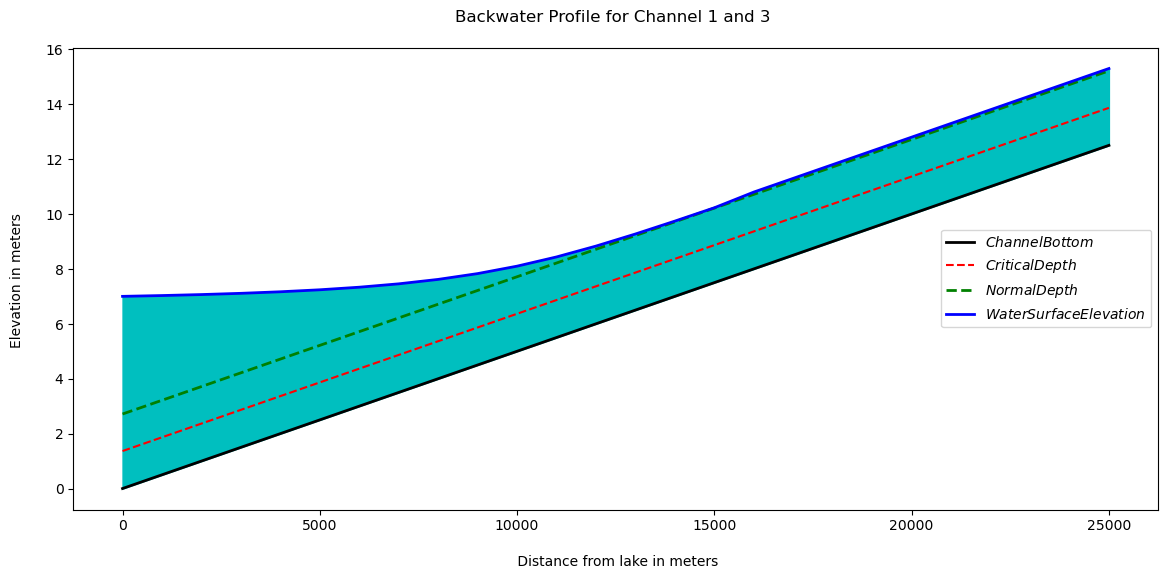

In [40]:
# FIND the last point on the upstream region
n_steps = length3/ dx

# CREATE empty lists to store the values of points, distance, critical, normal, and water depth, geodetical and piezometric height
points_13 = []
distance_13 = []
geodet_ht_13 = []
critcal_dpth_13 = []
norml_dpth_13 = []
wtr_depth_13 = []
piezo_ht_13 = []

# CREATE a loop that calculates distance, normal,critical, and water depth, geodetical and piezometric height at each distance step
# The point of reference for geodetical height is the river mouth of channel 1
# The values are calculated from one distance step after the point of bifurcation
# The loop will run for n_steps number of times
for i in range (1, int(n_steps + 1)):
    
    # CALCULATE the distance by multiplying point (i) with distance step
    d = dx * i 
    
    # ADD the length of channel 1 i.e. 15000m to get the actual distance of channel 3 from the river mouth
    dist = 15000 + d
    
    # CALCULATE the geodectical heights by mulplying the distance at the point and slope
    geo = dist * slope3
    
    # ADD geodetical height with calulated normal depth to compute the normal depth at a point for an inclined bed
    norm = norm_d3 + geo
    
    # ADD geodetical height with calculated critical depth to compute the critical depth at a point for an inclined bed
    crit = crit_d3 + geo
    
    # CALL the user-defined function back_water to calculate water depth
    h3 = back_water(Q3, height3, width3, slope3, dx, i, C)
    
    # Piezometric height is the sum of geodetical height with water depth
    piezo = geo + height3
    
    # ADD the values to their respective lists
    points_13.append(i)
    distance_13.append(dist)
    geodet_ht_13.append(geo)
    critcal_dpth_13.append(crit)
    norml_dpth_13.append(norm)
    wtr_depth_13.append(3)
    piezo_ht_13.append(piezo)
    i = i + 1

# CHANGE the list to tuple as the lists modify after every run of the cell
# ADD the two tuples of Channel 1 and 3 for each category to get the values along the entire channel
dist = tuple(distance1) + tuple(distance_13)
geo = tuple(geodet_ht1) + tuple(geodet_ht_13)
norm = tuple(norml_dpth1) + tuple(norml_dpth_13)
crit = tuple(critcal_dpth1) + tuple(critcal_dpth_13)
piez = tuple(piezo_ht1) + tuple(piezo_ht_13)

# DEFINE size, layout, names, and label for the graph
plt.figure(figsize=[14, 6])
plt.style.use('default') 
plt.title("Backwater Profile for Channel 1 and 3 \n")                  
plt.xlabel("\n Distance from lake in meters")                 
plt.ylabel("Elevation in meters \n")  

# DEFINE the style and name for each line, and PLOT the graph
plt.plot(dist, geo,  linestyle = '-',  color = 'k',  linewidth = 2.0, label = '$Channel Bottom$')
plt.plot(dist, crit, linestyle = '--', color = 'r',  linewidth = 1.5, label = '$Critical Depth$')
plt.plot(dist, norm, linestyle = '--', color = 'g',  linewidth = 2.0, label = '$Normal Depth$')
plt.plot(dist, piez, linestyle = '-',  color = 'b',  linewidth = 2.0, label = '$Water Surface Elevation$')
plt.fill_between(dist, geo, piez, color = 'c')


# DISPLAY the graph
plt.legend(loc = 5)
plt.show()

<a id='profile23'></a>
<a href='#table'>Go to the Notebook guide</a>

### B) Plot entire profile of channel 2 and 3

#### In case of NameError, run these cells in this particular order:

<a href='#library'>Python library</a>

<a href='#function'>Backwater function</a>

<a href='#parameters'>List of parameters</a>

<a href='#channel2'>Backwter Curve for Channel 2</a>

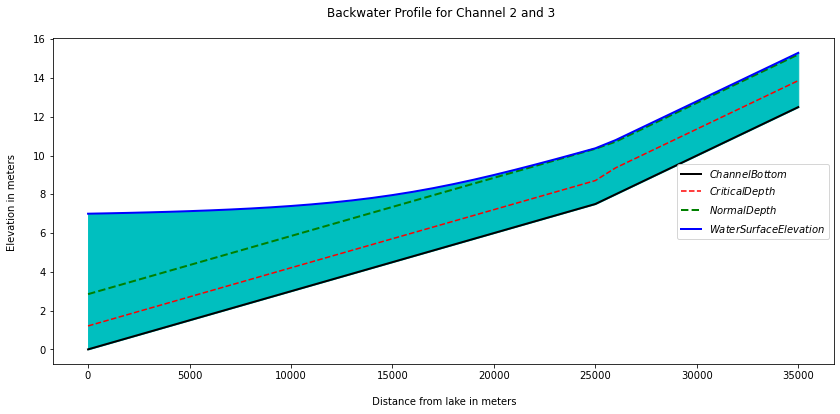

In [10]:
# FIND the last point on the upstream region
n_steps = length3/ dx

# CREATE empty lists to store the values of points, distance, critical, normal water depth, geodetical and piezometric height
points_23 = []
distance_23 = []
geodet_ht_23 = []
critcal_dpth_23 = []
norml_dpth_23 = []
wtr_depth_23 = []
piezo_ht_23 = []

# CREATE a loop that calculates distance, normal and critical depth, geodetical and piezometric height at each distance step
# The point of reference for geodetical height is the river mouth of channel 2
# The values are calculated from one distance step after the point of bifurcation
# The loop will run for n_steps number of times
for i in range (1, int(n_steps + 1)):
    
    # CALCULATE the distance by multiplying point (i) with distance step
    d = dx * i 
    
    # ADD the length of channel 2 i.e. 25000m to get the actual distance of channel 3 from the river mouth
    dist = 25000 + d
    
    # CALCULATE the geodectical heights by mulplying the distance at the point and slope
    # Here, the reference point for geodetical heigth is point of bifurcation
    # RAISE the caculated geodetical height of channel 3 to the last height of channel 2
    geo = round(geodet_ht2[-1], 2) + d * slope3
    
    # ADD geodetical height with calulated normal depth to compute the normal depth at a point for an inclined bed
    norm = norm_d3 + geo
    
    # ADD geodetical height with calculated critical depth to compute the critical depth at a point for an inclined bed
    crit = crit_d3 + geo
    
    # CALL the user-defined function back_water to calculate water depth
    h3 = back_water(Q3, height3, width3, slope3, dx, i, C)
    
    # Piezometric height is the sum of geodetical height with water depth
    piezo = geo + height3
    
    # ADD the values to their respective lists
    points_23.append(i)
    distance_23.append(dist)
    geodet_ht_23.append(geo)
    critcal_dpth_23.append(crit)
    norml_dpth_23.append(norm)
    wtr_depth_23.append(h3)
    piezo_ht_23.append(piezo)
    i = i + 1

# CHANGE the list to tuple as the lists modify after every run of the cell
# ADD the two tuples of Channel 1 and 3 for each category to get the values along the entire channel
dist = tuple(distance2) + tuple(distance_23)
geo = tuple(geodet_ht2) + tuple(geodet_ht_23)
norm = tuple(norml_dpth2) + tuple(norml_dpth_23)
crit = tuple(critcal_dpth2) + tuple(critcal_dpth_23)
piez = tuple(piezo_ht2) + tuple(piezo_ht_23)


# DEFINE size, layout, names, and label for the graph
plt.figure(figsize=[14, 6])
plt.style.use('default') 
plt.title("Backwater Profile for Channel 2 and 3 \n")                  
plt.xlabel("\n Distance from lake in meters")                 
plt.ylabel("Elevation in meters \n")  

# DEFINE the style and name for each line, and PLOT the graph
plt.plot(dist, geo,  linestyle = '-',  color = 'k',  linewidth = 2.0, label = '$Channel Bottom$')
plt.plot(dist, crit, linestyle = '--', color = 'r',  linewidth = 1.5, label = '$Critical Depth$')
plt.plot(dist, norm, linestyle = '--', color = 'g',  linewidth = 2.0, label = '$Normal Depth$')
plt.plot(dist, piez, linestyle = '-',  color = 'b',  linewidth = 2.0, label = '$Water Surface Elevation$')
plt.fill_between(dist, geo, piez, color = 'c')


# DISPLAY the graph
plt.legend(loc = 5)
plt.show()

<a href='#table'>Go to the Notebook guide</a>